<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />MSc. Carsten Bauer</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Vorlesung &mdash; Programmiertechniken 5</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2020</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2020-CompPhys.shtml)

**Themen dieses Notebooks:** Differentialgleichungen in Julia, Endliche Machinenpräzision

## Differentialgleichung in Julia

In [1]:
using DifferentialEquations

Links: [DifferentialEquations.jl](https://github.com/JuliaDiffEq/DifferentialEquations.jl) ([Dokumentation](https://docs.juliadiffeq.org/latest/index.html))

### Beispiel Problem: Kohlenstoffzerfall

Der Zerfall von Kohlenstoff-14 folgt der folgenden gewöhnlichen Differentialgleichung erster Ordnung

$$ \frac{du(t)}{dt} = −c u(t) = f(u, p ,t)$$

wobei $u(t)$ die Kohlenstoffkonzentration darstellt und $c=5730$ Jahre die Halbwertszeit von C14 ist.

### Allgemeine Schritte um das Problem in Julia zu lösen

1. Problem definieren
2. Problem lösen
3. Lösung analysieren/visualisieren

## Schritt 1: Problem definieren

Das **Anfangswertproblem** ist charakteresiert durch
* einen Anfangswert $u_0$,
* eine Zeitspanne $t_{span}$ und
* die Differentialgleichung $\frac{du}{dt} = f(u,p,t)$.

In [2]:
# Anfangswert & Zeitspanne
u0 = 1.0
tspan = (0.0, 1.0)

# Differentialgleichung
f(u, p, t) = - 5.730 * u

# ODE Problem
problem = ODEProblem(f, u0, tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 1.0)
u0: 1.0

## Schritt 2: Problem lösen

In [3]:
sol = solve(problem)

retcode: Success
Interpolation: Automatic order switching interpolation
t: 12-element Array{Float64,1}:
 0.0
 0.0497536522894885
 0.10705978201175329
 0.1781193455951372
 0.2581143744315121
 0.34843321246894143
 0.44651790563912386
 0.5520381042532021
 0.6634836116364619
 0.7801970473447266
 0.9013354512903653
 1.0
u: 12-element Array{Float64,1}:
 1.0
 0.7519478110084717
 0.541478294881148
 0.36037044123759854
 0.2278671736205124
 0.1358077726890973
 0.07741830959393117
 0.04229235840674502
 0.02233252827071907
 0.011442165146205073
 0.005715719743983306
 0.003247485069583693

## Schritt 3: Problem analysieren/visualisieren

In [4]:
sol.t

12-element Array{Float64,1}:
 0.0
 0.0497536522894885
 0.10705978201175329
 0.1781193455951372
 0.2581143744315121
 0.34843321246894143
 0.44651790563912386
 0.5520381042532021
 0.6634836116364619
 0.7801970473447266
 0.9013354512903653
 1.0

In [5]:
sol.u

12-element Array{Float64,1}:
 1.0
 0.7519478110084717
 0.541478294881148
 0.36037044123759854
 0.2278671736205124
 0.1358077726890973
 0.07741830959393117
 0.04229235840674502
 0.02233252827071907
 0.011442165146205073
 0.005715719743983306
 0.003247485069583693

Das Lösungsobjekt `sol` ist eine Funktion, die automatisch zwischen den berechneten Funktionswerten interpoliert:

In [6]:
sol(0.5432)

0.04448914861453559

In [7]:
u = u0 .* exp.(-5.730 .* sol.t) # analytische Lösung

12-element Array{Float64,1}:
 1.0
 0.7519477584296727
 0.5414781572043976
 0.3603700530810766
 0.22786649597551267
 0.13580675708864964
 0.07741709947690872
 0.04229111182408117
 0.02233140947954032
 0.011441260891846368
 0.005715050554208168
 0.0032470772336105863

In [8]:
using PyPlot

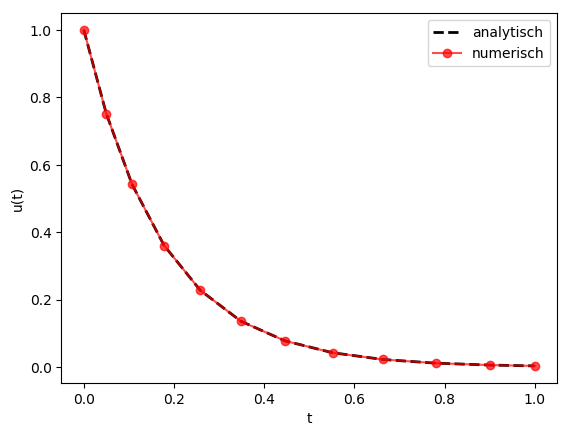

In [9]:
plot(sol.t, u, color="black", linewidth=2, linestyle="dashed", label="analytisch")
plot(sol.t, sol.u, color="red", alpha=.7, marker="o", label="numerisch")
legend()
ylabel("u(t)")
xlabel("t");

# 2. Differentialgleichungen höherer Ordnungen

### Beispiel Problem: Klassisches Pendel

$$
\ddot{\theta} + \frac{g}{L}{\sin(\theta)} = 0
$$

Analytisch lösen wir diese Differentialgleichung typischerweise in der "Kleine Winkel Näherung", d.h. $ sin(\theta) \approx \theta$, da wir sonst Elliptische Integrale erhalten die keine geschlossene analytische Lösung haben.

In Julia haben wir aber numerische Integratoren zur Hand! Wieso dann nicht die volle Differentialgleichung lösen?

$$
\begin{align}
\dot{u_1} &= u_2 \\
\dot{u_2} &= - \frac{g}{L}{\sin(u_1)}
\end{align}
$$

wobei $u_1 = \theta$ und $u_2 = \dot{\theta}$.

In [10]:
# Konstanten
g = 9.81
L = 1.0

# Anfangsbedingungen & Zeitspanne
u0 = [pi/2, 0]
tspan = (0.0, 6.3)
params = [g, L]

2-element Array{Float64,1}:
 9.81
 1.0

In [11]:
function pendulum!(du, u, p, t)
    g, L = p # Parameter "auspacken"
    
    du[1] = u[2]
    du[2] = - (g/L) * sin(u[1])
end

pendulum! (generic function with 1 method)

In [12]:
prob = ODEProblem(pendulum!, u0, tspan, params)

ODEProblem with uType Array{Float64,1} and tType Float64. In-place: true
timespan: (0.0, 6.3)
u0: [1.5707963267948966, 0.0]

In [13]:
sol = solve(prob, saveat=0.05)

retcode: Success
Interpolation: 1st order linear
t: 127-element Array{Float64,1}:
 0.0
 0.05
 0.1
 0.15
 0.2
 0.25
 0.3
 0.35
 0.4
 0.45
 0.5
 0.55
 0.6
 ⋮
 5.75
 5.8
 5.85
 5.9
 5.95
 6.0
 6.05
 6.1
 6.15
 6.2
 6.25
 6.3
u: 127-element Array{Array{Float64,1},1}:
 [1.5707963267948966, 0.0]
 [1.5585338873721093, -0.4904926579741727]
 [1.5217503517065067, -0.9807631294520581]
 [1.4604786210112137, -1.4697095843895813]
 [1.3748487039726496, -1.9544676622514534]
 [1.2651881983051303, -2.4296328090174066]
 [1.132186942734787, -2.8865845047774132]
 [0.9770344497610468, -3.3132048577262183]
 [0.8016247519959065, -3.694073686389691]
 [0.6086750956494059, -4.012061403108898]
 [0.4018793642529107, -4.250828856560403]
 [0.1858587105400751, -4.394580925411669]
 [-0.03457257432390747, -4.432833526743465]
 ⋮
 [-1.4285663377804794, -1.6245579890202855]
 [-1.4976428925727032, -1.136726787823286]
 [-1.5421987018435694, -0.6470591243580235]
 [-1.5622887179561875, -0.15692894375237762]
 [-1.5580383423384

In [14]:
x = rand(10)

10-element Array{Float64,1}:
 0.6013535922017661
 0.2789290082634053
 0.14224674221921774
 0.09032164855221625
 0.726862238524913
 0.9216591695169207
 0.943954109133091
 0.9770902257211374
 0.7513930777754982
 0.4801856915061078

In [15]:
x[3]

0.14224674221921774

In [16]:
getindex(x, 3)

0.14224674221921774

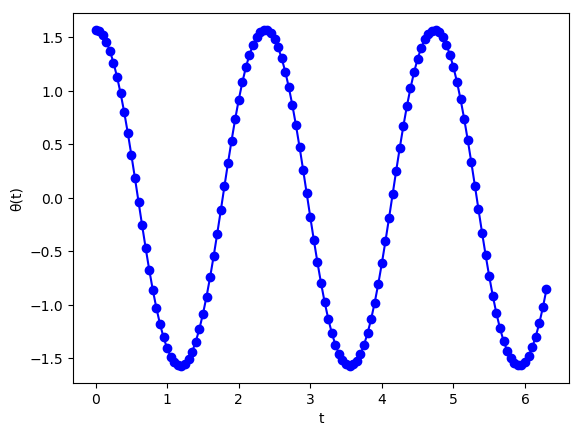

In [17]:
plot(sol.t, getindex.(sol.u, 1), "bo-",);
xlabel("t")
ylabel("θ(t)");

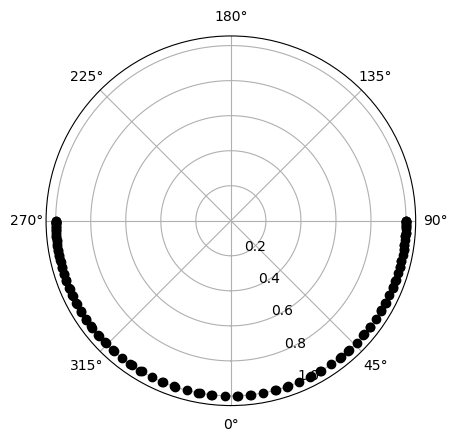

In [18]:
for u in sol.u
    polar(u[1], L, marker="o", linestyle="none", color="black")
end

# Rotate polar plot such that zero is "in the south"
gca().set_theta_zero_location("S")

# 3. Differentialgleichungssysteme: Der Lorenz-Attraktor

Für die Simulation eines einfachen **Wetter-Modells** hat der Meteorologe Edward Lorenz 1963 eine Beschreibung von 
Luftströmungen entworfen. Dazu hat er ein Gleichungssystem von drei gekoppelten Differentialgleichungen betrachtet:

$$
\begin{align}
\frac{d x}{d t} &= \sigma(y-x) \\
\frac{d y}{d t} &= x(\rho-z)-y \\
\frac{d z}{d t} &= x y-\beta z
\end{align}
$$

Im folgenden wollen wir dieses Differentialgleichungssytem lösen.

In [19]:
σ = 10.0
ρ = 28.0
β = 8/3

params = [σ, ρ, β]

function lorenz!(du,u,p,t)
    σ, ρ, β = p
    du[1] = σ * (u[2] - u[1])
    du[2] = u[1] * (ρ - u[3]) - u[2]
    du[3] = u[1] * u[2] - β * u[3]
end

lorenz! (generic function with 1 method)

In [20]:
u0 = [1.0; 0.0; 0.0]

tspan = (0.0, 100.0)

prob = ODEProblem(lorenz!, u0, tspan, params)

sol = solve(prob, saveat=0.01)

retcode: Success
Interpolation: 1st order linear
t: 10001-element Array{Float64,1}:
   0.0
   0.01
   0.02
   0.03
   0.04
   0.05
   0.06
   0.07
   0.08
   0.09
   0.1
   0.11
   0.12
   ⋮
  99.89
  99.9
  99.91
  99.92
  99.93
  99.94
  99.95
  99.96
  99.97
  99.98
  99.99
 100.0
u: 10001-element Array{Array{Float64,1},1}:
 [1.0, 0.0, 0.0]
 [0.9179244486277306, 0.2663399883958265, 0.0012638961610231109]
 [0.8679193806275423, 0.5117405221648474, 0.0046554489845949155]
 [0.8453600810424241, 0.7446542578856288, 0.009835866378798786]
 [0.8468056451056966, 0.9723322686162557, 0.01673452988174231]
 [0.8697858478642188, 1.2011328308675078, 0.025486243607962873]
 [0.9126414552178186, 1.4367663939448458, 0.03640115766854124]
 [0.9743847413621038, 1.6845201726702408, 0.0499584260358821]
 [1.0546231178470253, 1.9494049510715725, 0.0668156858164365]
 [1.1534564425013134, 2.236343236012357, 0.08784004081242848]
 [1.2714553023178143, 2.5502478518794636, 0.11413844664321433]
 [1.4096121501793102,

In [21]:
ux = getindex.(sol.u, 1) # getindex(x, i) == x[i]
uy = getindex.(sol.u, 2)
uz = getindex.(sol.u, 3)

pygui(true) # activate external plotting window
plot3D(ux, uy, uz);

In [22]:
pygui(false); # deactivate external plotting window

## Differentialgleichungen mit Messunsicherheiten

In [23]:
using Measurements

In [24]:
# Anfangswert & Zeitspanne
u0 = 1.0 ± 0.1 # measurement(1.0, 0.1)
tspan = (0.0 ± 0.0, 1.0 ± 0.0)

# Differentialgleichung
f(u,p,t) = - (5.730 ± 2) * u

# ODE Problem
problem = ODEProblem(f, u0, tspan)

ODEProblem with uType Measurement{Float64} and tType Measurement{Float64}. In-place: false
timespan: (0.0 ± 0.0, 1.0 ± 0.0)
u0: 1.0 ± 0.1

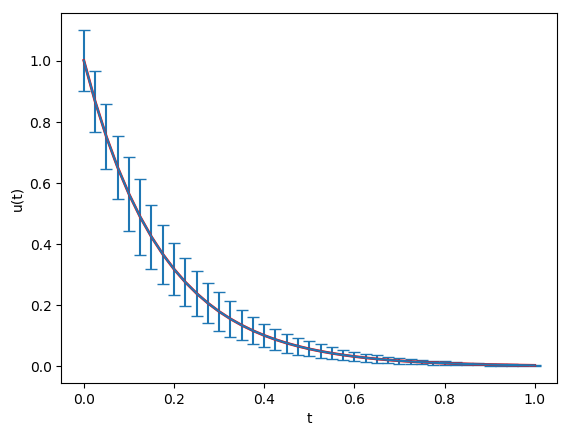

In [25]:
sol = solve(problem, saveat=0.025)

# analytic solution
u = u0 .* exp.(-(5.730 ± 2) .* sol.t);

# plot solution
ts = getfield.(sol.t, :val)
solvals = getfield.(sol, :val)
solerrs = getfield.(sol, :err);

errorbar(ts, solvals, yerr=solerrs)
plot(ts, getfield.(u, :val), color="red", lw=2)
ylabel("u(t)")
xlabel("t");

Randkommentar: Das Beeindruckende ist hier, dass die Autoren von DifferentialEquations.jl und Measurements.jl [nie zusammengearbeitet haben](https://discourse.julialang.org/t/differentialequations-jl-and-measurements-jl/6350). Das Feature wurde durch Julias Konstruktionsprinzip "automatisch" erzeugt. Für Interessierte gibt es [hier](https://github.com/crstnbr/JuliaOulu20/blob/master/Day1/4_generic_programming.ipynb) mehr dazu.

# Endliche Machinenpräzision

Wie Objekte im Computer repräsentiert werden, d.h. wie sie in Nullen und Einsen kodiert werden, ist durch ihren Typ bestimmt. Wir können den Typ einer Variable mit Hilfer der Funktion `typeof` herausfinden.

In [26]:
a = 5

5

In [27]:
typeof(a)

Int64

In [28]:
c = "5"

"5"

In [29]:
typeof(c)

String

In [30]:
a = 5.0

5.0

In [31]:
typeof(a)

Float64

In [32]:
5 == 5.0

true

In [33]:
5 === 5.0

false

Julia ist eine sogenannte <b>dynamisch typisierte Sprache</b>, was bedeutet, dass Objekte ihren Typ dynamisch je nach Kontext verändern können. Zu jedem Zeitpunkt hat jedes Objekt jedoch einen bestimmten Typ.

In [34]:
a = 3
println(typeof(a))

a = "test"
println(typeof(a))

Int64
String


Die herkömmlichen Datentypen wie `Int64` und `Float64` stellen Zahlen durch eine endliche Anzahl von 64 Bits (Einsen und Nullen) dar. Daraus folgt direkt, dass z.B. nicht jede Fließkommazahl exakt repräsentiert werden kann.

In [35]:
1.2 + 0.12

1.3199999999999998

In [36]:
x = 1.2 + 0.12

1.3199999999999998

In [37]:
x - 1.32 < 1e-12

true

In [38]:
isapprox(x, 1.32)

true

In [39]:
x ≈ 1.32

true

Ein weiterer Effekt der endlichen Repräsentation von Zahlen ist der sogenannt *Integer-Overflow*.

In [40]:
x = typemax(Int64)

9223372036854775807

In [41]:
x + 1

-9223372036854775808

In den allermeisten Fällen ist die endliche Machinenpräzision kein Problem. Falls doch kann man, auf Kosten der Laufzeit, Datentypen mit beliebiger Präzision verwenden:

In [42]:
x = big"1.2"

1.200000000000000000000000000000000000000000000000000000000000000000000000000007

In [43]:
typeof(x)

BigFloat

In [44]:
big"1.2" + big"0.12"

1.320000000000000000000000000000000000000000000000000000000000000000000000000004